<a href="https://colab.research.google.com/github/FreeMagic200/paga_umap/blob/main/05_add_back_umap_coord_seu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(qs)
library(Seurat)

qs 0.26.3

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [ ]:
seu_obj <- qread("../11-2_subclass_cluster_annotated_unassign_filtered.qs")

In [ ]:
paga_umap_coord <- read.csv("./paga_umap_coordinates.csv")
head(paga_umap_coord)

,X,X0,X1
,<chr>,<dbl>,<dbl>
1,_E11_1_TCGGATATCCATCCGT-1,2.4462097,4.2573730
2,_E11_1_TTAGTCTCACATGAAA-1,1.9186720,4.7616673
3,_E11_1_TAACGACGTAGTCACT-1,-0.1330111,4.7896460
4,_E11_1_CTGCTCAGTAGCGTCC-1,2.8805890,5.5118140
5,_E11_1_AGCGCTGCAACCTATG-1,8.4024180,-0.5818705
6,_E11_1_TGAGACTTCGGCACTG-1,1.2417564,4.7181973


In [ ]:
# Extract just the barcode part (assuming the format matches your Seurat object)
paga_umap_coord$barcode <- paga_umap_coord$X

# Create a matrix from the UMAP coordinates
umap_matrix <- as.matrix(paga_umap_coord[, c("X0", "X1")])

# Critically: set rownames to match the cell barcodes in seu_obj
# This is likely where the issue occurred
rownames(umap_matrix) <- paga_umap_coord$barcode

# Ensure column names are set correctly
colnames(umap_matrix) <- c("UMAP_1", "UMAP_2")

# Now check if all rownames in umap_matrix exist in seu_obj
if(!all(rownames(umap_matrix) %in% colnames(seu_obj))){
  # If they don't match, you may need to fix the barcode format
  print("Warning: Not all barcodes in PAGA UMAP match cell barcodes in Seurat object")
  print(paste("PAGA UMAP rows:", nrow(umap_matrix)))
  print(paste("Matching cells:", sum(rownames(umap_matrix) %in% colnames(seu_obj))))

  # Show sample of barcodes from both sources to help debug
  print("Sample PAGA barcodes:")
  print(head(rownames(umap_matrix)))
  print("Sample Seurat barcodes:")
  print(head(colnames(seu_obj)))
}

# Only include cells that exist in seu_obj
cells_to_keep <- rownames(umap_matrix)[rownames(umap_matrix) %in% colnames(seu_obj)]
umap_matrix_filtered <- umap_matrix[cells_to_keep, ]

# Create a new dimension reduction object
paga_umap <- CreateDimReducObject(
  embeddings = umap_matrix_filtered,
  key = "pagaUMAP_",
  assay = DefaultAssay(seu_obj)
)


In [ ]:
# Add the new reduction to the Seurat object
seu_obj[["paga.umap"]] <- paga_umap

# Verify it was added correctly
print(Reductions(seu_obj))

 [1] "pca"                 "integrated.jointpca" "integrated.mnn"     
 [4] "integrated.harmony"  "integrated.cca"      "integrated.rpca"    
 [7] "mnn.umap"            "jointpca.umap"       "harmony.umap"       
[10] "rpca.umap"           "cca.umap"            "umap"               
[13] "paga.umap"          


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), 

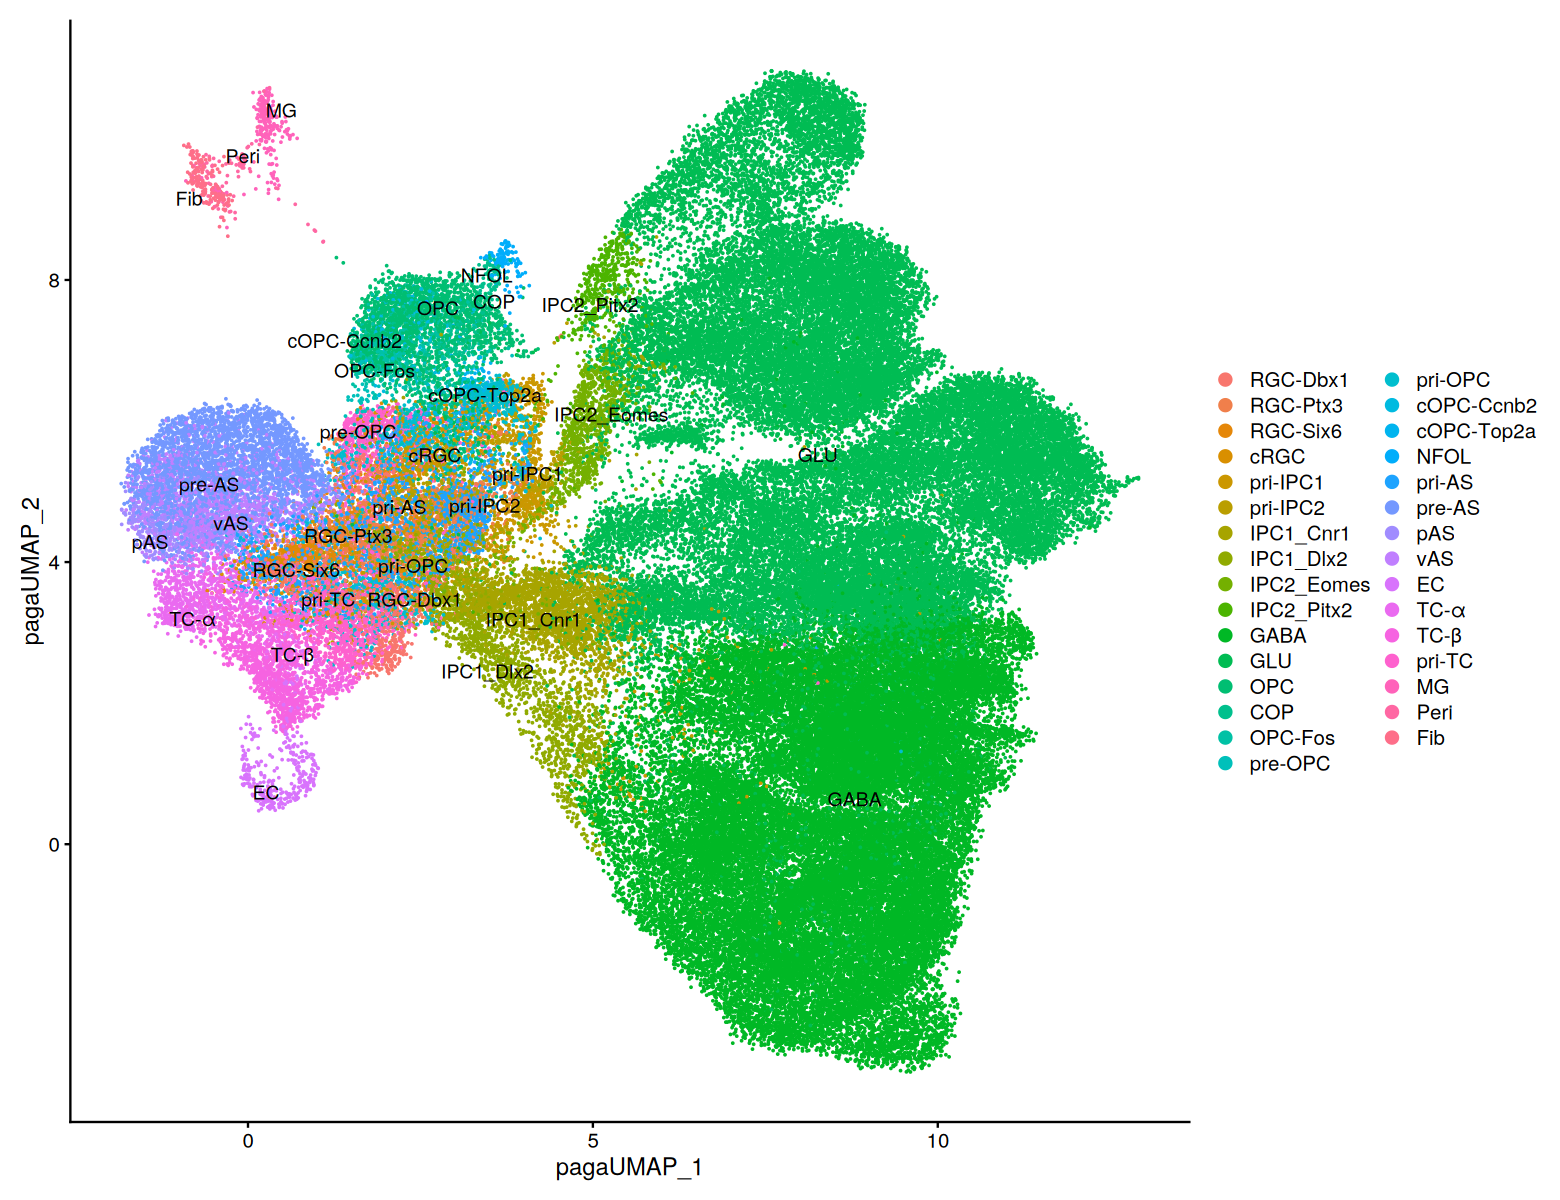

In [ ]:
options(repr.plot.width=13,repr.plot.height = 10, dpi = 200)
DimPlot(seu_obj,reduction = "paga.umap",raster = F,label = T,repel = T)

In [ ]:
# 生成 DimPlot
p <- DimPlot(seu_obj, reduction="paga.umap", raster=F, label=T, repel=T)

# 保存到 PDF 文件
pdf("paga_umap_dim_plot.pdf", width=13, height=10)  # 设置 PDF 文件的尺寸
print(p)  # 将 DimPlot 对象打印到 PDF 文件
dev.off()  # 关闭 PDF 设备

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TC-α' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), 

pdf 
  2

In [ ]:
# 将 subclass_annotation 列转换为因子，并指定 UTF-8 编码
seu_obj@meta.data$subclass_annotation <- factor(seu_obj@meta.data$subclass_annotation,
                                                 levels = unique(seu_obj@meta.data$subclass_annotation),
                                                 encoding = "UTF-8")

ERROR: Error in factor(seu_obj@meta.data$subclass_annotation, levels = unique(seu_obj@meta.data$subclass_annotation), : unused argument (encoding = "UTF-8")


In [ ]:
# 将 subclass_annotation 列转换为字符向量
subclass_annotation_char <- as.character(seu_obj@meta.data$subclass_annotation)

# 检查编码
Encoding(subclass_annotation_char)

[1] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
    [8] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [15] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [22] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [29] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [36] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [43] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [50] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [57] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [64] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [71] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [78] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [85] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [92] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
   [99] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [106] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [113] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [120] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [127] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [134] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [141] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [148] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [155] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [162] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [169] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [176] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [183] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [190] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [197] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [204] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [211] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [218] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [225] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [232] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [239] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [246] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [253] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [260] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [267] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [274] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [281] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [288] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [295] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [302] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [309] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [316] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [323] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [330] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [337] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [344] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [351] "unknown" "unknown" "unknown" "unknown" "unknown" "unknown" "unknown"
  [358] "unknown" "unknown

In [ ]:
qsave(seu_obj,"./12-1_paga_umap_seu.qs")